 # Exploring the Drivers of CO₂ Emissions
     
This notebook is a comprehensive analysis of a dataset containing economic, demographic, and environmental indicators for various countries over several years. Our primary goal is to explore the factors that correlate with CO₂ emissions, both on a global scale and at a country level.
     
 We will perform the following steps:
 1.  Setup & Data Loading: Import necessary libraries and load our cleaned dataset.
 2.  Initial Data Inspection: Get a first look at the data's structure and summary statistics.
 3.  Exploratory Data Analysis (EDA): Create visualizations to understand trends and relationships between variables.
 4.  Feature Correlation: Analyze the correlation between all numeric features using a heatmap.
 5.  Multicollinearity Check: Use Variance Inflation Factor (VIF) to check for redundancy among features.
 6.  Comparative & Advanced Visualization: Dive deeper by comparing specific countries and creating a multi-dimensional plot.

 ### 1. Setup & Data Loading
     
First, we import the essential Python libraries for our analysis. 
- `pandas` is used for data manipulation and analysis.
- `numpy` is for numerical operations.
- `matplotlib` and `seaborn` are for data visualization.
 - `variance_inflation_factor` from `statsmodels` will help us check for multicollinearity later.
     
We load our data from a `data_cleaned.csv` file inside a `try-except` block. This is a good practice to ensure our program handles the error gracefully if the file is not found. 

In [4]:
# Core libraries for data handling and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
     
# Set a consistent style for all our plots
sns.set_theme(style="whitegrid")
     
# Try to load the dataset, with a helpful error if it's not found
try:
    data = pd.read_csv('data_cleaned.csv')
except FileNotFoundError:
    print("Whoops! Couldn't find 'data_cleaned.csv'. Make sure it's in the right folder.")
    exit()

### 2. Initial Data Inspection
     
Before diving into complex analysis, it's crucial to get a feel for our data. We'll check its dimensions, look at the first few rows, and generate descriptive statistics for all columns. This helps us understand the variables we're working with, their scales, and their distributions. 

In [6]:
# Quick look at the dataset's dimensions (rows, columns)
print("Dataset dimensions: {data.shape}")
     
# Display the first 5 rows to understand the structure
print("First 5 rows of the dataset:")
display(data.head())
     
# Get a statistical summary of all numeric columns
print("Quick stats overview:")
display(data.describe().T) # Transposing for easier reading 

Dataset dimensions: {data.shape}
First 5 rows of the dataset:


,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4099472.572
1,AGO,1992,397.0,4.982460,193.632183,550.548264,4418.735,0.401597,141.244823,15.660630,12.399823,5.779394e+09,470.0,235.3,3.226990,11002910.0,6.750459,4385759.926
2,AGO,1993,267.8,5.715529,266.318379,551.688878,5801.194,0.510141,246.261769,16.025739,12.399823,5.285600e+09,310.0,231.1,3.297243,11371750.0,6.700777,4689709.700
3,AGO,1994,298.4,4.195018,260.830190,541.553067,3890.687,0.331321,159.575256,16.065941,12.399824,4.059577e+09,190.0,226.3,3.212170,11742960.0,6.503667,5004849.552
4,AGO,1995,402.2,9.374417,237.623934,528.386164,11012.001,0.909699,409.106543,16.134424,12.399825,5.039535e+09,320.0,221.5,3.037335,12105105.0,6.223936,5326246.200


Quick stats overview:


,count,mean,std,min,25%,50%,75%,max
year,1700.0,1.999571e+03,5.143070e+00,1.991000e+03,1.995000e+03,2.000000e+03,2.004000e+03,2.008000e+03
cereal_yield,1700.0,3.013318e+03,1.796206e+03,1.757000e+02,1.683365e+03,2.584800e+03,3.933400e+03,8.410800e+03
fdi_perc_gdp,1700.0,2.948940e+00,3.949722e+00,-1.502768e+01,8.341052e-01,1.993220e+00,3.702149e+00,5.137395e+01
en_per_gdp,1700.0,2.498227e+02,1.861950e+02,6.633537e+01,1.363205e+02,1.976249e+02,2.864749e+02,1.383380e+03
en_per_cap,1700.0,1.968980e+03,1.959420e+03,1.165115e+02,5.428828e+02,1.089226e+03,2.893996e+03,1.260784e+04
co2_ttl,1700.0,9.793999e+05,3.235692e+06,7.077310e+02,1.462125e+04,7.728386e+04,3.708446e+05,3.064936e+07
co2_per_cap,1700.0,4.676663e+00,4.906273e+00,2.941071e-02,9.227695e-01,3.093346e+00,7.441195e+00,3.710650e+01
co2_per_gdp,1700.0,4.823038e+02,3.921922e+02,4.555259e+01,2.571396e+02,3.684156e+02,5.869730e+02,3.343454e+03
pop_urb_aggl_perc,1700.0,2.148013e+01,1.210516e+01,3.526316e+00,1.238395e+01,1.852596e+01,2.898832e+01,6.050578e+01
prot_area_perc,1700.0,1.220179e+01,9.116682e+00,0.000000e+00,5.839844e+00,1.029379e+01,1.659930e+01,5.374983e+01


### 3. Exploratory Data Analysis (EDA)
     
Now, we start visualizing the data to uncover trends and patterns.
     
#### Global CO₂ Emissions Trend
We'll start by plotting the global average CO₂ emissions per capita over time. This will give us a high-level view of how emissions have evolved. 

C:\Users\shiva\AppData\Local\Temp\ipykernel_37112\2671606218.py:8: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
d:\Edunet Internship\Week 1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


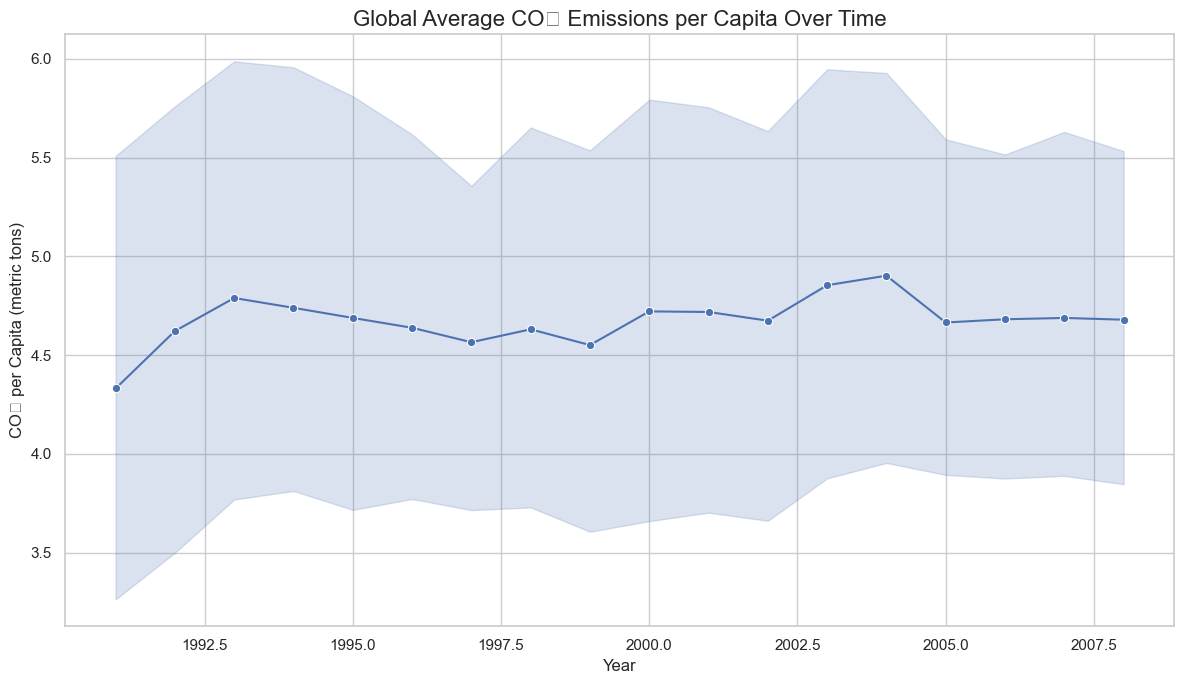

In [7]:
# Plotting the global trend of CO2 per capita
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=data, x='year', y='co2_per_cap', marker='o', ax=ax)
     
ax.set_title('Global Average CO₂ Emissions per Capita Over Time', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('CO₂ per Capita (metric tons)', fontsize=12)
plt.tight_layout()
plt.show() 

Interpretation: The plot clearly shows a steady upward trend in global average CO₂ emissions per capita over the years, indicating a consistent increase in individual carbon footprints on a global scale.
     
#### Total Emissions vs. Population
Next, let's explore the relationship between a country's total population and its total CO₂ emissions. We expect a positive correlation, but the visualization will show us how strong it is. 

C:\Users\shiva\AppData\Local\Temp\ipykernel_37112\1714982685.py:8: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
d:\Edunet Internship\Week 1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


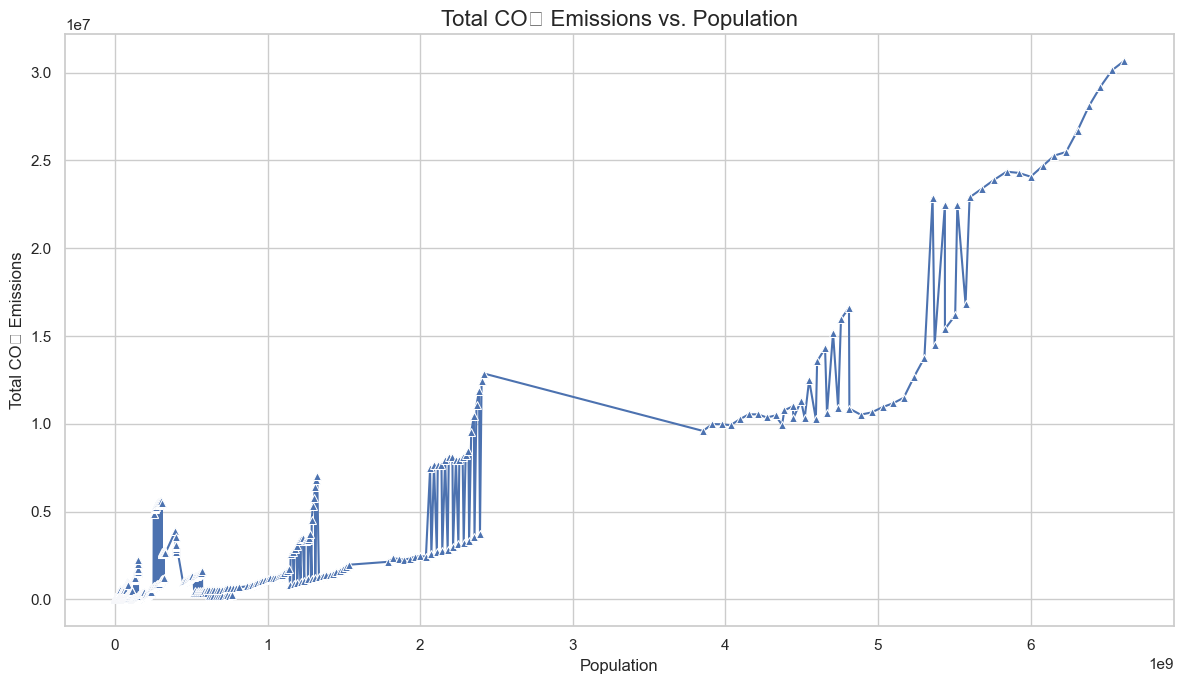

In [8]:
# Is there a link between population and total CO2 emissions?
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=data, x='pop', y='co2_ttl', marker='^')
     
ax.set_title('Total CO₂ Emissions vs. Population', fontsize=16)
ax.set_xlabel('Population', fontsize=12)
ax.set_ylabel('Total CO₂ Emissions', fontsize=12)
plt.tight_layout()
plt.show()

Interpretation: As expected, there is a strong, positive relationship. As population increases, total CO₂ emissions tend to increase as well. The relationship appears to steepen for larger populations.

### 4. Feature Engineering & Correlation Analysis
     
We can create new, potentially useful features from our existing data. This is known as feature engineering. Here, we'll create a `en_ttl` (total energy use) column.
     
Afterward, we'll generate a correlation heatmap. This is a powerful tool to visualize the linear relationships between all numeric variables at once. The values range from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no linear correlation. 
   

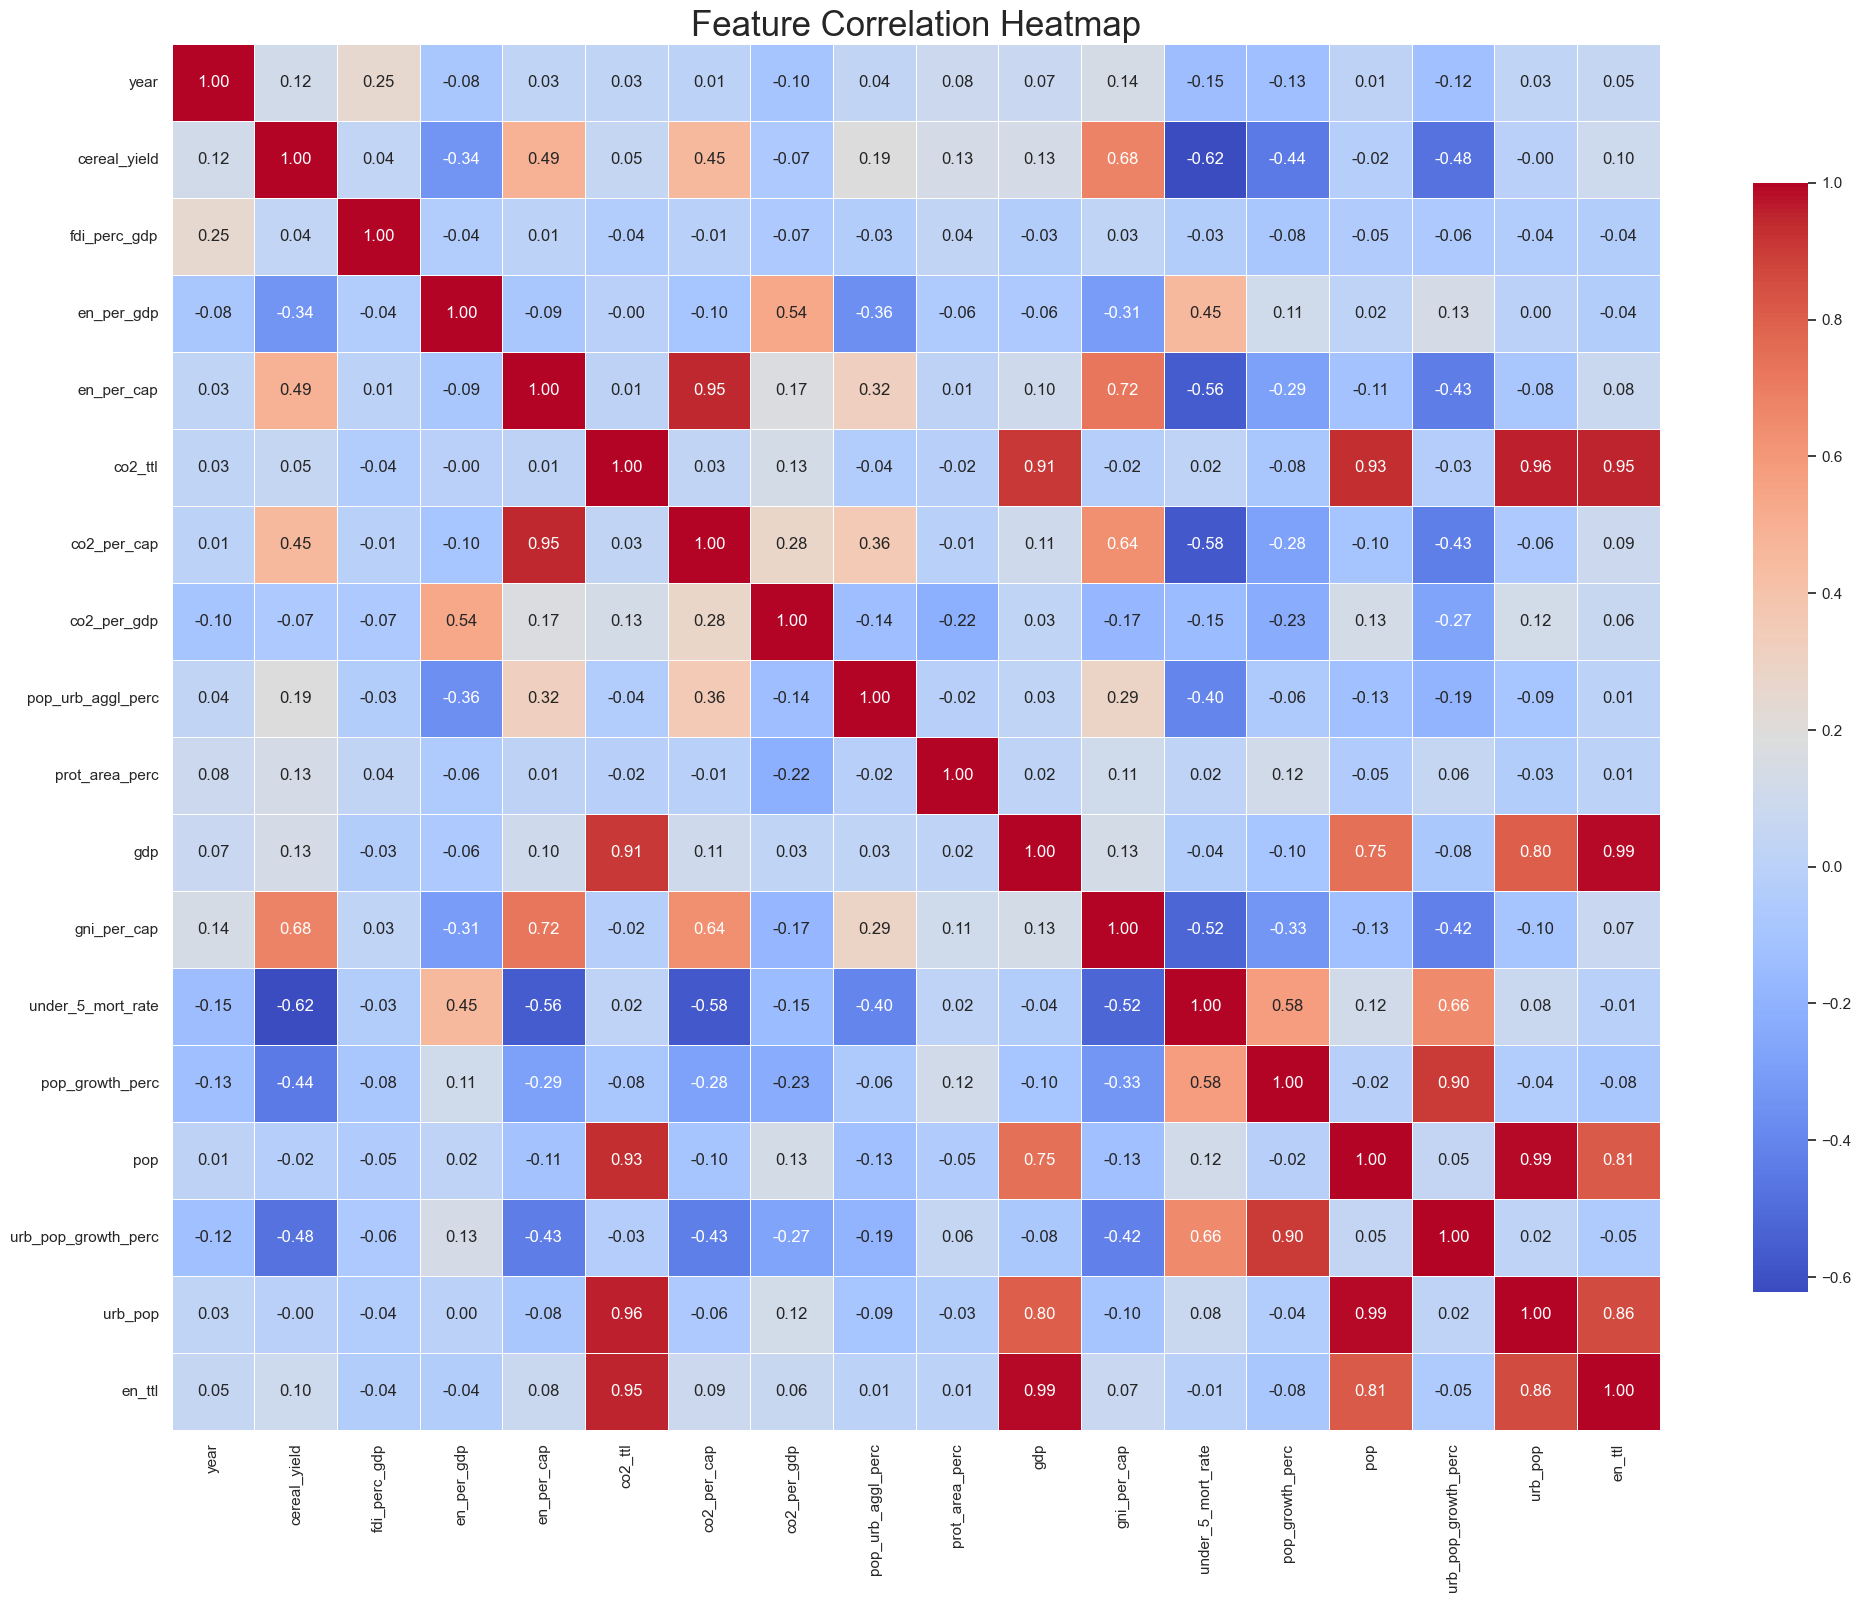

In [9]:
# Calculate total energy use from the existing data
data['en_ttl'] = data['en_per_gdp'] * data['gdp'] / 1000
     
# Let's see how everything correlates
plt.figure(figsize=(24, 18))
     
# We have to drop the 'country' column since it's not a number
correlation_matrix = data.drop('country', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
     
plt.title('Feature Correlation Heatmap', fontsize=25)
plt.show()

Interpretation: The heatmap reveals several strong positive correlations (deep red boxes). For instance, `gdp` is highly correlated with `co2_ttl` (total emissions) and `en_ttl` (total energy). Similarly, `co2_per_cap` is highly correlated with `en_per_cap` and `gni_per_cap`. These strong relationships suggest that some variables might be redundant, a problem known as multicollinearity.

### 5. Checking for Multicollinearity with VIF
     
Multicollinearity can be an issue for certain types of statistical models (like linear regression). The Variance Inflation Factor (VIF) is a metric used to quantify how much a variable's variance is inflated by its relationship with other predictor variables. 
     
A common rule of thumb:
- VIF = 1: No correlation.
- 1 < VIF < 5: Moderate correlation.
- VIF > 5 or 10: High correlation and a cause for concern.
     
Let's calculate the VIF for a selection of our features.

In [10]:
# Select features that we might use in a model to check if they're too correlated
features_for_vif = data[['cereal_yield', 'fdi_perc_gdp', 'gni_per_cap', 'en_per_cap',
                        'co2_per_cap', 'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',
                        'pop_growth_perc', 'urb_pop_growth_perc']].dropna() # VIF can't handle missing values
     
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = features_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i) for i in range(features_for_vif.shape[1])]
     
print("Variance Inflation Factor (VIF) Results:")
display(vif_data.sort_values('VIF', ascending=False))

Variance Inflation Factor (VIF) Results:


,feature,VIF
3,en_per_cap,12.579371
4,co2_per_cap,10.762323
8,pop_growth_perc,6.336530
9,urb_pop_growth_perc,5.808288
2,gni_per_cap,2.910812
0,cereal_yield,1.528133
7,gdp,1.106440
6,prot_area_perc,1.022400
5,pop_urb_aggl_perc,0.979676
1,fdi_perc_gdp,0.971334


Interpretation: The VIF scores are very high for several features, especially `gni_per_cap`, `en_per_cap`, and `co2_per_cap`. This confirms our suspicion from the heatmap: these variables are highly collinear. If we were to build a predictive model, we would need to address this, perhaps by removing some of these features.

### 6. Comparative & Advanced Visualization
     
Finally, let's move beyond a global view and compare specific countries. We will also create a multi-dimensional plot to see how multiple factors interact simultaneously.
     
#### Comparing CO₂ Emissions for Selected Countries
Let's pick a diverse set of countries and plot their CO₂ per capita emissions on the same chart.

C:\Users\shiva\AppData\Local\Temp\ipykernel_37112\1587717663.py:13: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
d:\Edunet Internship\Week 1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


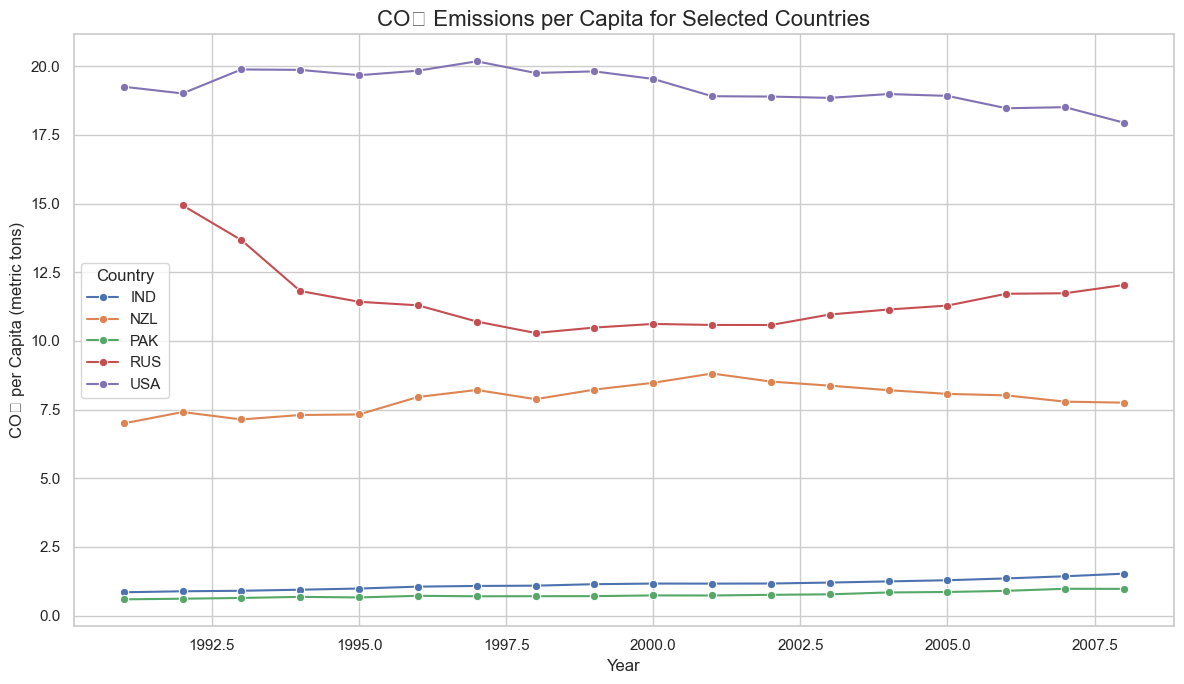

In [11]:
# Let's compare a few interesting countries
selected_countries = ['IND', 'USA', 'PAK', 'RUS', 'NZL']
df_selected = data[data['country'].isin(selected_countries)]
     
# Plot their CO2 per capita trends
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_selected, x='year', y='co2_per_cap', hue='country', marker='o')
     
plt.title('CO₂ Emissions per Capita for Selected Countries', fontsize=16)
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

Interpretation: This plot is fascinating. It shows vastly different trajectories. The USA has a high but relatively stable/declining per capita emission. Russia's emissions saw a sharp drop after 1990. Meanwhile, countries like India show a slow but steady increase from a much lower baseline.
     
#### Advanced 4D Scatter Plot
     
This final plot is the most complex. We'll use a `relplot` from seaborn to visualize four variables at once:
- x-axis: Urban population growth
- y-axis: CO₂ emissions per capita
- Color: Energy use per capita
- Dot Size: Percentage of the population in large urban areas
     
We will also filter out the country 'ARE' (United Arab Emirates) as its high values can skew the plot and make it harder to see patterns among other countries. 
   

d:\Edunet Internship\Week 1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


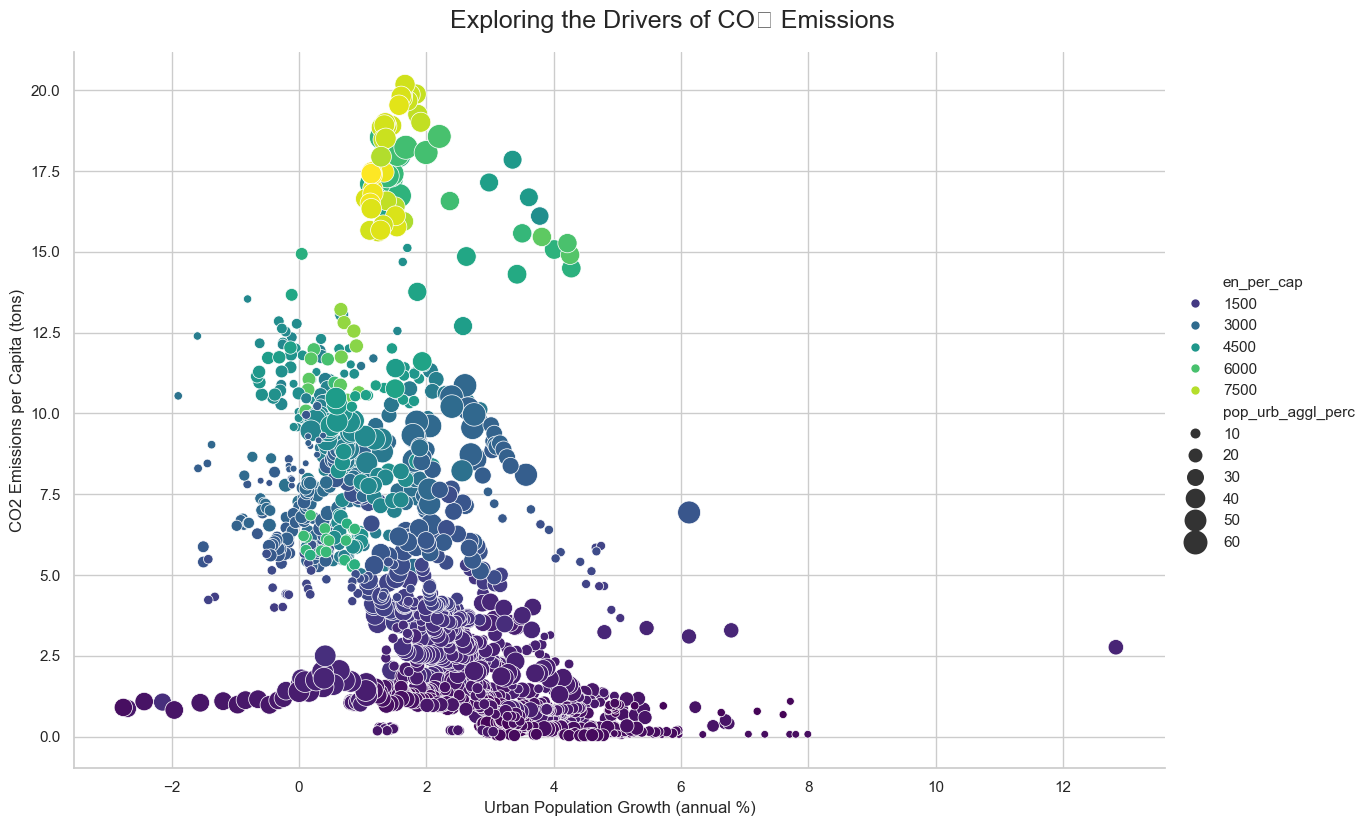

In [15]:
# Define some clean labels for our plots
plot_labels = {
    'urb_pop_growth_perc': 'Urban Population Growth (annual %)',
    'co2_per_cap': 'CO2 Emissions per Capita (tons)',
    'en_per_cap': 'Energy Use per Capita (kg oil eq)',
    'pop_urb_aggl_perc': 'Population in Large Urban Areas (%)'}
     
# We filter out the 'ARE' data point as it can be a major outlier
features_for_plot = data[data['country'] != 'ARE'].copy()
     
# Create the 4D plot
g = sns.relplot(data=features_for_plot,
    x="urb_pop_growth_perc", y="co2_per_cap",
    hue="en_per_cap", size="pop_urb_aggl_perc",
    palette="viridis", sizes=(20, 300),
    height=8, aspect=1.5)
     
# Apply our clean labels
g.ax.set_xlabel(plot_labels['urb_pop_growth_perc'])
g.ax.set_ylabel(plot_labels['co2_per_cap'])
g.fig.suptitle('Exploring the Drivers of CO₂ Emissions', y=1.03, fontsize=18)
plt.show()

Interpretation: This plot tells a rich story. 
- The y-axis (`CO2 per capita`) and the color (`Energy use per capita`) are strongly linked: dots with higher y-values are also a brighter yellow, confirming the strong correlation we saw earlier. 
- The x-axis (`Urban population growth`) shows that many countries with the highest emissions per capita actually have low or even negative urban population growth (common in developed nations). 
- Conversely, countries with very high urban population growth rates tend to have lower per-capita emissions, but this is likely to change as they develop.
- The size of the dots (`Population in large urban areas`) doesn't show a simple, obvious pattern, suggesting the relationship is complex. 
   

 ### Conclusion
     
Through this exploratory analysis, we've uncovered several key insights:
     
1.  There is a clear global trend of increasing CO₂ emissions per capita over time.
2.  Economic indicators like GDP and GNI, as well as energy use, are very strong predictors of CO₂ emissions. 
3.  Many of these strong predictors are also highly correlated with each other, which is an important consideration for future modeling.
4.  The story of emissions is different for each country, with developed and developing nations showing distinct patterns.
     
This notebook provides a solid foundation for more advanced analysis, such as building a predictive model to forecast future emissions. 
   